# NBA Free Throws - Analysis of Outside Factors

This is an analysis of free throws in the NBA.

The data consists of every free throw taken from the 2006-2016 NBA seasons.

618,019 free throws in total.

Formal:

Making a free throw should be a simple task for the best basketball players in the world, right?

For most players in the NBA, this is generally the case, with the league average free throw percentage sitting just above 75%.

Some players, however, have a serious struggle with the shot, sometimes even [famously](https://en.wikipedia.org/wiki/Hack-a-Shaq) (See Shaquille O'Neal).

Overall, there's quite a significant discrepency of free throw accuracy between NBA players, with the best percentage of the 2018-2019 season being .928, held by Malcolm Brogdon, and the lowest being .449, achieved by Hassan Whiteside. (basketball-reference.com - out of players with at least 200 free throws in the season).

The point of all this babbling is that a made free throw is highly dependent on individual player skill.

But are there other factors that can affect a free throw shot during a game, such as time left, game importance or even the current game score?

Are these factors significant enough to show free throw trends that transcend individual player skill?

To answer these questions I will be analyzing a dataset of every free throw taken in the NBA from 2006 to 2016, which consists of 610,019 free throws in chronological order, the players who took them, the teams that were playing, the end results of the games, whether the games were playoff or regular season, and the current period, time and score of the game at the time of the shot.

For the main part of my analysis I will be ignoring the player who is shooting and instead be analyzing all other circumstances surrounding each shot.

((although certain players might be analyzed in more detail for bonus insights))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('free_throws.csv', engine='python')
#print(df)

In [28]:
labels = ['Made', 'Missed']
colors = ['green', 'red']
def makepie(data, title):
    plt.pie(data.value_counts(), autopct='%1.1f%%', labels=labels, colors=colors)
    plt.title(title)

In [99]:
shots_made = df['shot_made']
players = df['player']
#time = df['time']

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time,time_mins
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45,11
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45,11
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26,7
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26,7
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18,7
5,106 - 114,PHX - LAL,261031013.0,1.0,Amare Stoudemire makes free throw 1 of 2,Amare Stoudemire,regular,33 - 20,2006 - 2007,1,3:15,3
6,106 - 114,PHX - LAL,261031013.0,1.0,Amare Stoudemire makes free throw 2 of 2,Amare Stoudemire,regular,34 - 20,2006 - 2007,1,3:15,3
7,106 - 114,PHX - LAL,261031013.0,2.0,Leandro Barbosa misses free throw 1 of 2,Leandro Barbosa,regular,43 - 29,2006 - 2007,0,10:52,10
8,106 - 114,PHX - LAL,261031013.0,2.0,Leandro Barbosa makes free throw 2 of 2,Leandro Barbosa,regular,44 - 29,2006 - 2007,1,10:52,10
9,106 - 114,PHX - LAL,261031013.0,2.0,Lamar Odom makes free throw 1 of 2,Lamar Odom,regular,44 - 30,2006 - 2007,1,10:37,10


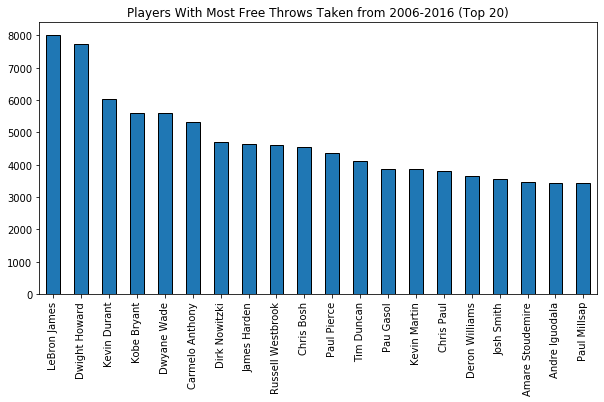

In [36]:
#PLAYERS - TOTAL SHOTS
#plt.bar(players.value_counts().head(20), height=1)
players.value_counts().head(20).plot(kind='bar', figsize=(10,5), edgecolor='black', linewidth=1, title='Players With Most Free Throws Taken from 2006-2016 (Top 20)')

While it's true that better players get fouled more and thus take more free throws, the best players in the NBA are not necessarily the best free throw shooters.

In fact, the top two players on this list, LeBron James and Dwight Howard, both shoot them below the average, at 73.6% and 56.7% respectively.

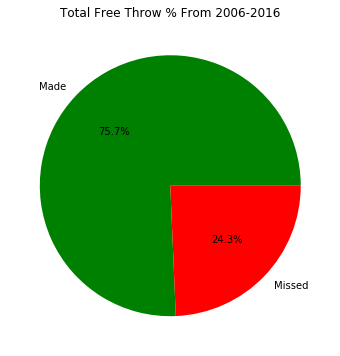

In [33]:
#PIE CHART - TOTAL FT%
plt.figure(figsize=(10,6))

plt.pie(shots_made.value_counts(), autopct='%1.1f%%', labels=labels, colors=colors)
plt.title('Total Free Throw % From 2006-2016')

plt.show()

Like I mentioned before, the average NBA free throw percentage sits just above 75%

Let's see how averages are affected based on a variety of circumstances.

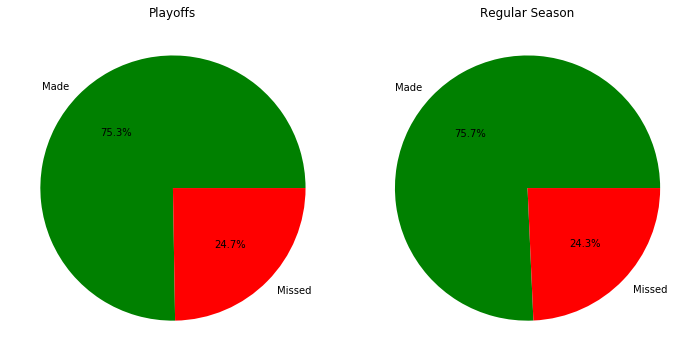

In [32]:
#2 PIE CHARTS - FT% PLAYOFFS vs FT% REGULAR SEASON
playoff_games = df[df['playoffs'] == 'playoffs']
regular_games = df[df['playoffs'] != 'playoffs']

shots_made_p = playoff_games['shot_made']
shots_made_r = regular_games['shot_made']

#PLOT
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
makepie(shots_made_p, 'Playoffs')

plt.subplot(1, 2, 2)
makepie(shots_made_r, 'Regular Season')

plt.tight_layout()

plt.show()

We can see that there's a difference of .4% between regular season and playoff shooting, but is this significant?

In [127]:
print('Playoff Games from 2006-2016: {}'.format(len(playoff_games)))
print('Regular Games from 2006-2016: {}'.format(len(regular_games)))

print(575893/43126)

Playoff Games from 2006-2016: 42126
Regular Games from 2006-2016: 575893
13.353730927978482


Considering there are many more (13x) regular season games than playoffs, it would be easy to discount this difference as a result of a smaller playoffs sample size.

But 42,000 is a large sample size...

NOTE: BINOMIAL DISTRIBUTION ANALYSIS

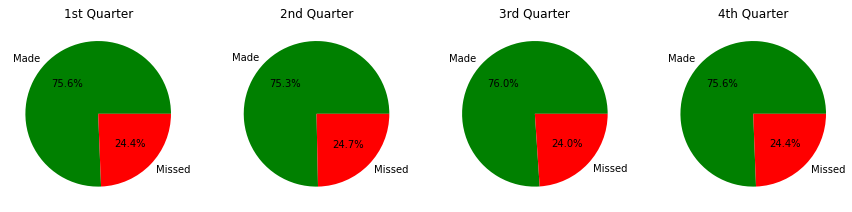

In [31]:
#FT% in each quarter
q1 = df[df['period'] == 1]
q2 = df[df['period'] == 2]
q3 = df[df['period'] == 3]
q4 = df[df['period'] == 4]

shots_made_q1 = q1['shot_made']
shots_made_q2 = q2['shot_made']
shots_made_q3 = q3['shot_made']
shots_made_q4 = q4['shot_made']

#PLOT
plt.figure(figsize=(15,5))

plt.subplot(1, 4, 1)
makepie(shots_made_q1, '1st Quarter')

plt.subplot(1, 4, 2)
makepie(shots_made_q2, '2nd Quarter')

plt.subplot(1, 4, 3)
makepie(shots_made_q3, '3rd Quarter')

plt.subplot(1, 4, 4)
makepie(shots_made_q4, '4th Quarter')

While there is only small differences between free throw percentage in each quarter, it is interesting to note that the 3rd quarter is the most significant outlier, yielding the highest percentage. This may be worth further investigation.

In [101]:
#FT% vs TIME LEFT (CLUTCH TIME)

#CONVERT 'time' COLUMN FOR USE WITH CONDITIONALS

#make copy of dataframe to leave original intact
df2 = df

#trim seconds off times
time_mins = [time[:-3] for time in time]

#convert time strings into ints
time_mins = list(map(int, time_mins))

#add time_mins column to df2
df2['time_mins'] = time_mins
#df2

df2['score'] = df2['score'].map(lambda x: x.)


In [103]:
tmp = '12 - 24'
x = int(tmp)
